# Ill-conditioned matrix

Determinant numerically unstable for ill-conditioned matrices. We try Kulkarni/Colbourn sampling with different levels of matrix conditioning and compare it to samples from Castaway (and Wilson) sampling.

In [126]:
import networkx as nx
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from treesampling.utils import graphs, math, visualization
from treesampling.algorithms import kirchoff_rst, wilson_rst
from treesampling.algorithms.castaway_legacy import random_spanning_tree as castaway_rst
from treesampling.algorithms.castaway_legacy import _castaway_rst_log as castaway_log_rst
from treesampling.utils.graphs import graph_weight, kirchoff_matrix, mat_minor, reset_adj_matrix
from treesampling.utils.math import generate_matrix_with_condition_number, generate_random_matrix
from treesampling.utils.visualization import plot_logweights_heatmap


p=0.8
p=5e-30
p=1e-200
p=0.8
p=5e-30
p=1e-200


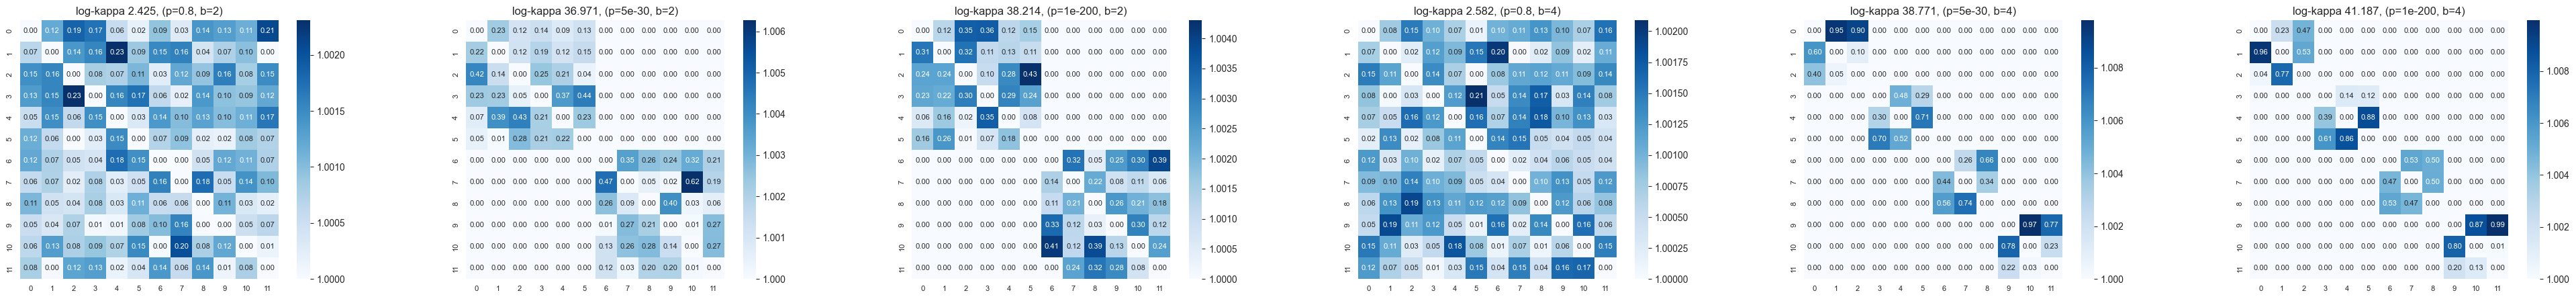

In [117]:
params = [(8e-1,2), (5e-30,2), (1e-200,2), (8e-1,4), (5e-30,4), (1e-200,4)]
n_nodes = 12
fig, axs = plt.subplots(1, len(params), figsize=(50, 5))
for i, (p, n_blocks) in enumerate(params):
    print(f"p={p}")
    graph = graphs.random_weakly_connected_k_subgraphs(n_nodes, k=n_blocks, log_probs=False, weak_weight=p)
    weights = nx.to_numpy_array(graph)
    L = np.diag(weights.sum(axis=0)) - weights
    L1r = mat_minor(L, 0, 0)
    # print("L:", L)
    #weights = generate_matrix_with_condition_number(n_nodes, cn)
    ax = visualization.plot_logweights_heatmap(weights, ax=axs[i])
    ax.set_title(f"log-kappa {np.log(la.cond(L1r)):.3f}, (p={p}, b={n_blocks})")


In [120]:
# pick one matrix
sample_size = 2000
p, n_blocks = (1e-30, 4)
graph = graphs.random_weakly_connected_k_subgraphs(n_nodes, k=n_blocks, log_probs=False, weak_weight=p)

In [125]:
log_graph = reset_adj_matrix(graph, np.log(nx.to_numpy_array(graph)))

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_72517/409378346.py:1: RuntimeWarning: divide by zero encountered in log
  log_graph = reset_adj_matrix(graph, np.log(nx.to_numpy_array(graph)))


In [127]:
# sample trees
# Castaway
edge_freq_castaway = np.zeros((n_nodes, n_nodes))
for i in range(sample_size):
    tree = castaway_log_rst(log_graph, root=0)
    for e in tree.edges():
        edge_freq_castaway[e] += 1


/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/castaway_legacy.py:344: RuntimeWarning: divide by zero encountered in log
  ry = - np.log(1 - np.exp(ry_1))
/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/castaway_legacy.py:344: RuntimeWarning: invalid value encountered in log
  ry = - np.log(1 - np.exp(ry_1))


ValueError: l1: nan, l2: nan, l1 should be greater than l2

In [59]:
# wilson
edge_freq_wilson = np.zeros((n_nodes, n_nodes))
for i in range(sample_size):
    tree = wilson_rst(graph)
    for e in tree.edges():
        edge_freq_wilson[e] += 1


KeyboardInterrupt: 

In [76]:
# kulkarni A8
edge_freq_kirch = np.zeros((n_nodes, n_nodes))
for i in range(sample_size):
    tree = kirchoff_rst(graph, root=0)
    for e in tree.edges():
        edge_freq_kirch[e] += 1


Text(0.5, 1.0, 'Kirchoff')

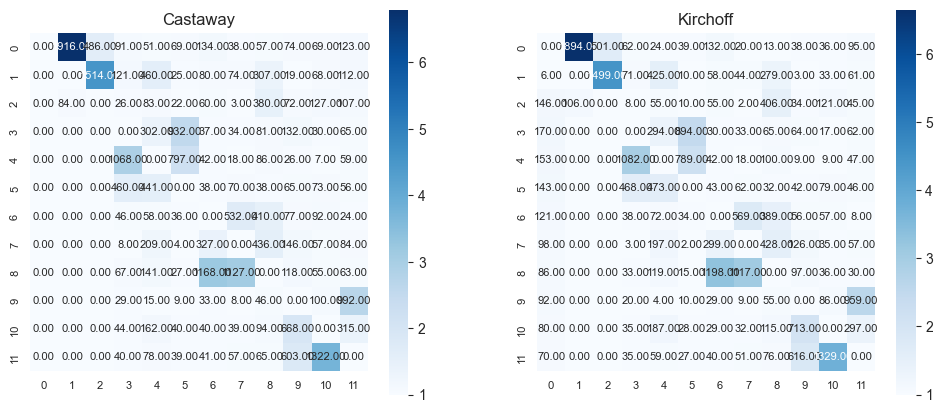

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
visualization.plot_logweights_heatmap(edge_freq_castaway, ax=axs[0], color_tempering=1000)
axs[0].set_title('Castaway')
visualization.plot_logweights_heatmap(edge_freq_kirch, ax=axs[1], color_tempering=1000)
axs[1].set_title('Kirchoff')


# Build weight matrix with 2 ill-conditioned blocks
If $A \in M^{N x N}$ is a matrix with condition number $\kappa$, then build a symmetric matrix $W \in M^{2N x 2N}$ with two blocks $A$ above and below diagonal, and zeros on the rest of the elements.
$$
\begin{pmatrix}
0 & A \\
A & 0
\end{pmatrix}
$$



[[ 9.37412695e+13  5.86303896e+13 -3.05430361e+14  3.86671165e+14
  -5.65331658e+13  3.39276706e+13 -1.90118127e+14 -2.54259848e+13]
 [ 5.86303896e+13  3.67287318e+13 -1.91258240e+14  2.42150915e+14
  -3.53745977e+13  2.12455663e+13 -1.19066034e+14 -1.58988525e+13]
 [-3.05430361e+14 -1.91258240e+14  9.96044601e+14 -1.26105935e+15
   1.84260040e+14 -1.10643361e+14  6.20057869e+14  8.28288375e+13]
 [ 3.86671165e+14  2.42150915e+14 -1.26105935e+15  1.59659285e+15
  -2.33276546e+14  1.40082032e+14 -7.85040264e+14 -1.04858991e+14]
 [-5.65331658e+13 -3.53745977e+13  1.84260040e+14 -2.33276546e+14
   3.40982023e+13 -2.04679707e+13  1.14698703e+14  1.53327751e+13]
 [ 3.39276706e+13  2.12455663e+13 -1.10643361e+14  1.40082032e+14
  -2.04679707e+13  1.22905698e+13 -6.88778070e+13 -9.20073339e+12]
 [-1.90118127e+14 -1.19066034e+14  6.20057869e+14 -7.85040264e+14
   1.14698703e+14 -6.88778070e+13  3.86002630e+14  5.15566156e+13]
 [-2.54259848e+13 -1.58988525e+13  8.28288375e+13 -1.04858991e+14
   

/Users/zemp/PycharmProjects/treesampling/src/treesampling/utils/visualization.py:20: RuntimeWarning: overflow encountered in exp
  sns_plot = sns.heatmap(np.exp(weights / color_tempering),


<Axes: >

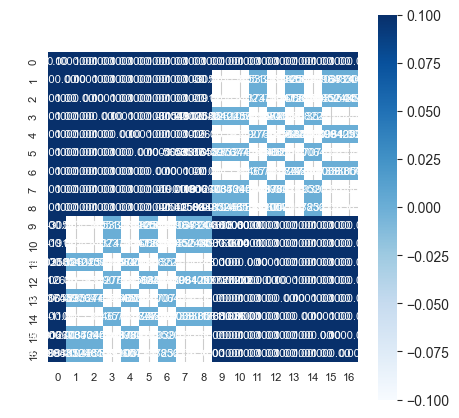

In [115]:
N = 8
A = generate_random_matrix(N, 10e30)
print(A)
W = np.ones((2*N + 1, 2*N + 1))
W[1:N+1, N+1:] = A
W[N+1:, 1:N+1] = A
W[np.diag_indices(W.shape[0])] = 0
W = 1000 * W

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_logweights_heatmap(W, ax=ax)

In [114]:
from treesampling.utils.graphs import mat_minor, kirchoff_matrix

L = kirchoff_matrix(W)
L1r = mat_minor(L, 0, 0)
la.cond(L1r)

2.3868700871825213e+17